In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## Read in Data

In [2]:
tourney = pd.read_csv('Final_Data.csv')
prediction_data = pd.read_csv('Input_Data.csv')
tourney.drop(['Unnamed: 0'], axis = 1, inplace = True)
tourney['point_diff'] = (tourney['Tm.'] - tourney['Opp.'])
tourney['ppg'] = tourney['Tm.'] / tourney['G']
tourney['rpg'] = tourney['TRB'] / tourney['G']
tourney['apg'] = tourney['AST'] / tourney['G']
tourney['spg'] = tourney['STL'] / tourney['G']
tourney['bpg'] = tourney['BLK'] / tourney['G']
tourney['tpg'] = tourney['TOV'] / tourney['G']
tourney['ftapg'] = tourney['FTA'] / tourney['G']
tourney['papg'] = tourney['Opp.'] / tourney['G']
tourney['opp_point_diff'] = tourney['Opp_Tm'] - tourney['Opp_Opp']
tourney['opp_ppg'] = tourney['Opp_Tm'] / tourney['Opp_G']
tourney['opp_rpg'] = tourney['Opp_TRB'] / tourney['Opp_G']
tourney['opp_ftapg'] = tourney['Opp_FTA'] / tourney['G']
tourney['opp_apg'] = tourney['Opp_AST'] / tourney['Opp_G']
tourney['opp_spg'] = tourney['Opp_STL'] / tourney['Opp_G']
tourney['opp_bpg'] = tourney['Opp_BLK'] / tourney['Opp_G']
tourney['opp_tpg'] = tourney['Opp_TOV'] / tourney['Opp_G']
tourney['Round'] = tourney['Round'].apply(lambda x: str(x) + "_round")
tourney['Seed'] = tourney['Seed'].apply(lambda x: str(x) + "_seed")
tourney['Opp_Seed'] = tourney['Opp_Seed'].apply(lambda x: str(x) + "_seedopp")
#tourney['Seed'] = tourney['Seed'].astype('category')
#tourney['Opp_Seed'] = tourney['Opp_Seed'].astype('category')
prediction_data.drop(['Unnamed: 0'], axis = 1, inplace = True)
prediction_data['point_diff'] = prediction_data['Tm.'] - prediction_data['Opp.']
prediction_data['ppg'] = prediction_data['Tm.'] / prediction_data['G']
prediction_data['rpg'] = prediction_data['TRB'] / prediction_data['G']
prediction_data['apg'] = prediction_data['AST'] / prediction_data['G']
prediction_data['spg'] = prediction_data['STL'] / prediction_data['G']
prediction_data['bpg'] = prediction_data['BLK'] / prediction_data['G']
prediction_data['tpg'] = prediction_data['TOV'] / prediction_data['G']
prediction_data['papg'] = prediction_data['Opp.'] / prediction_data['G']
prediction_data['opp_point_diff'] = prediction_data['Opp_Tm'] - prediction_data['Opp_Opp']
prediction_data['opp_ppg'] = prediction_data['Opp_Tm'] / prediction_data['Opp_G']
prediction_data['opp_rpg'] = prediction_data['Opp_TRB'] / prediction_data['Opp_G']
prediction_data['opp_apg'] = prediction_data['Opp_AST'] / prediction_data['Opp_G']
prediction_data['opp_spg'] = prediction_data['Opp_STL'] / prediction_data['Opp_G']
prediction_data['opp_bpg'] = prediction_data['Opp_BLK'] / prediction_data['Opp_G']
prediction_data['opp_tpg'] = prediction_data['Opp_TOV'] / prediction_data['Opp_G']
prediction_data['Round'] = prediction_data['Round'].apply(lambda x: str(x) + "_round")
prediction_data['Seed'] = prediction_data['Seed'].apply(lambda x: str(x) + "_seed")
prediction_data['Opp_Seed'] = prediction_data['Opp_Seed'].apply(lambda x: str(x) + "_seedopp")

## EDA

In [3]:
prediction_data

,Round,Region,Seed,Team,Opponent,Opp_Seed,G,W_overall,L_overall,W-L%,...,bpg,tpg,papg,opp_point_diff,opp_ppg,opp_rpg,opp_apg,opp_spg,opp_bpg,opp_tpg
0,1_round,Midwest,1_seed,Illinois,Drexel,16_seedopp,29,23,6,0.793,...,2.827586,13.172414,69.241379,88,71.473684,33.947368,15.157895,4.684211,2.368421,12.894737
1,1_round,Midwest,16_seed,Drexel,Illinois,1_seedopp,19,12,7,0.632,...,2.368421,12.894737,66.842105,353,81.413793,40.413793,16.310345,5.724138,2.827586,13.172414
2,1_round,Midwest,2_seed,Houston,Cleveland State,15_seedopp,27,24,3,0.889,...,4.666667,10.851852,57.851852,23,71.461538,35.000000,13.961538,7.000000,2.500000,12.846154
3,1_round,Midwest,15_seed,Cleveland State,Houston,2_seedopp,26,19,7,0.731,...,2.500000,12.846154,70.576923,534,77.629630,41.111111,14.111111,8.185185,4.666667,10.851852
4,1_round,Midwest,3_seed,West Virginia,Morehead State,14_seedopp,27,18,9,0.667,...,2.851852,12.148148,72.111111,163,68.833333,37.500000,12.733333,4.400000,5.000000,15.300000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,1_round,West,11_seed,Drake,Southern California,6_seedopp,29,25,4,0.862,...,2.965517,10.310345,64.655172,280,74.758621,39.482759,13.655172,4.793103,5.275862,12.448276
68,1_round,West,7_seed,Oregon,Virginia Commonwealth,10_seedopp,26,20,6,0.769,...,3.615385,11.423077,67.423077,170,71.692308,34.230769,13.346154,9.230769,5.384615,14.615385
69,1_round,West,10_seed,Virginia Commonwealth,Oregon,7_seedopp,26,19,7,0.731,...,5.384615,14.615385,65.153846,181,74.384615,33.038462,13.423077,7.461538,3.615385,11.423077
70,1_round,West,8_seed,Oklahoma,Missouri,9_seedopp,25,15,10,0.600,...,3.440000,11.080000,69.240000,43,73.640000,35.680000,13.200000,6.720000,3.520000,13.440000


In [4]:
tourney.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2394 entries, 0 to 2393
Data columns (total 78 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Year            2394 non-null   int64  
 1   Round           2394 non-null   object 
 2   Region Number   2394 non-null   int64  
 3   Region Name     2394 non-null   object 
 4   Seed            2394 non-null   object 
 5   Score           2394 non-null   int64  
 6   Team            2394 non-null   object 
 7   Opponent        2394 non-null   object 
 8   Opp_Score       2394 non-null   int64  
 9   Opp_Seed        2394 non-null   object 
 10  Win             2394 non-null   int64  
 11  G               2394 non-null   int64  
 12  W_overall       2394 non-null   int64  
 13  L_overall       2394 non-null   int64  
 14  W-L%            2394 non-null   float64
 15  SRS             2394 non-null   float64
 16  SOS             2394 non-null   float64
 17  Tm.             2394 non-null   i

In [5]:
tourney.head()

,Year,Round,Region Number,Region Name,Seed,Score,Team,Opponent,Opp_Score,Opp_Seed,...,ftapg,papg,opp_point_diff,opp_ppg,opp_rpg,opp_ftapg,opp_apg,opp_spg,opp_bpg,opp_tpg
0,2001,1_round,1,Midwest,1_seed,96,Illinois,Northwestern St,54,16_seedopp,...,25.142857,65.914286,-105,71.625000,36.812500,25.057143,12.250000,9.625000,4.156250,16.781250
1,2001,1_round,1,Midwest,16_seed,54,Northwestern St,Illinois,96,1_seedopp,...,27.406250,74.906250,418,77.857143,40.000000,27.500000,15.714286,7.685714,4.171429,14.971429
2,2001,1_round,1,Midwest,2_seed,101,Arizona,Eastern Illinois,76,15_seedopp,...,26.111111,66.277778,125,82.709677,36.258065,18.055556,16.580645,6.354839,3.741935,13.774194
3,2001,1_round,1,Midwest,15_seed,76,Eastern Illinois,Arizona,101,2_seedopp,...,20.967742,78.677419,540,81.277778,39.805556,30.322581,16.250000,7.861111,4.416667,15.166667
4,2001,1_round,1,Midwest,3_seed,72,Ole Miss,Iona,70,14_seedopp,...,23.685714,64.628571,174,77.242424,37.545455,23.485714,14.575758,7.848485,5.545455,16.878788


In [6]:
tourney.describe()

,Year,Region Number,Score,Opp_Score,Win,G,W_overall,L_overall,W-L%,SRS,...,ftapg,papg,opp_point_diff,opp_ppg,opp_rpg,opp_ftapg,opp_apg,opp_spg,opp_bpg,opp_tpg
count,2394.00000,2394.000000,2394.000000,2394.000000,2394.000000,2394.000000,2394.000000,2394.000000,2394.000000,2394.000000,...,2394.000000,2394.000000,2394.000000,2394.000000,2394.000000,2394.000000,2394.000000,2394.000000,2394.000000,2394.000000
mean,2010.00000,2.444444,69.898496,69.898496,0.500000,35.032581,26.362155,8.670426,0.749786,14.723154,...,21.489439,65.630277,326.279866,74.821341,36.289197,21.570752,14.730228,7.032916,4.078178,12.690743
std,5.47837,1.123973,12.045816,12.045816,0.500104,2.465089,4.421059,3.094349,0.093432,7.196261,...,2.755674,4.654791,159.869847,5.234050,3.040356,3.343814,1.841865,1.347278,1.219452,1.698798
min,2001.00000,1.000000,29.000000,29.000000,0.000000,27.000000,13.000000,1.000000,0.406000,-15.280000,...,12.323529,50.862069,-194.000000,57.851852,21.482759,11.000000,9.500000,3.470588,0.750000,7.400000
25%,2005.00000,1.000000,61.000000,61.000000,0.000000,33.000000,23.000000,7.000000,0.677000,11.530000,...,19.712814,62.462242,215.000000,71.253676,34.400000,19.314662,13.425325,6.081081,3.216850,11.487179
50%,2010.00000,2.000000,70.000000,70.000000,0.500000,35.000000,26.000000,9.000000,0.750000,15.700000,...,21.378378,65.470588,317.000000,74.631579,36.303030,21.430502,14.584770,6.911765,3.945946,12.705882
75%,2015.00000,3.000000,78.000000,78.000000,1.000000,37.000000,29.000000,11.000000,0.816000,19.490000,...,23.378378,68.833578,418.000000,78.368421,38.292017,23.741353,15.913655,7.848485,4.756757,13.794118
max,2019.00000,4.000000,121.000000,121.000000,1.000000,41.000000,38.000000,20.000000,0.974000,32.180000,...,31.333333,81.687500,843.000000,90.945946,45.548387,34.727273,21.416667,11.774194,8.870968,19.419355


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

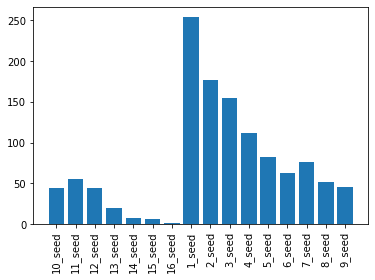

In [7]:
by_seed = tourney.groupby('Seed').sum().reset_index()
plt.bar(x = by_seed['Seed'], height = by_seed['Win'])
plt.xticks(rotation = 'vertical')

In [8]:
matchups = tourney.groupby(['Seed','Opp_Seed']).sum().reset_index()
matchups

,Seed,Opp_Seed,Year,Region Number,Score,Opp_Score,Win,G,W_overall,L_overall,...,ftapg,papg,opp_point_diff,opp_ppg,opp_rpg,opp_ftapg,opp_apg,opp_spg,opp_bpg,opp_tpg
0,10_seed,11_seedopp,6041,8,206,214,1,107,69,38,...,65.576532,195.387520,864,222.678078,106.748949,66.120429,41.599775,19.311111,9.177928,34.857057
1,10_seed,15_seedopp,6029,9,221,165,3,106,71,35,...,67.399468,199.901037,714,225.418750,107.043750,66.041769,40.059821,20.641071,12.324107,38.424107
2,10_seed,1_seedopp,6040,8,191,204,1,110,75,35,...,55.700450,193.382883,1675,234.272973,111.410135,63.018018,50.616892,21.003378,13.516216,33.324324
3,10_seed,2_seedopp,52268,59,1728,1860,8,900,606,294,...,538.211416,1725.798854,11204,1992.845496,990.843575,610.861542,398.501341,174.598032,120.846271,332.806918
4,10_seed,3_seedopp,14040,17,481,503,2,243,182,61,...,147.603981,460.516786,2796,532.589599,266.303676,159.903001,108.009064,53.316291,36.697034,97.623559
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,9_seed,2_seedopp,2013,2,70,66,1,39,30,9,...,20.282051,61.153846,402,70.243243,32.945946,18.692308,13.324324,6.702703,4.378378,10.189189
128,9_seed,3_seedopp,2018,2,54,58,0,35,23,12,...,22.457143,72.885714,423,73.634146,33.341463,20.485714,14.268293,6.365854,3.073171,9.243902
129,9_seed,4_seedopp,4022,3,149,160,1,67,45,22,...,42.957143,142.198214,871,159.389025,79.403767,43.933036,32.576577,13.354627,8.621622,26.048321
130,9_seed,5_seedopp,4028,2,113,117,1,72,55,17,...,36.915058,122.087259,538,148.594595,77.216216,46.963707,29.594595,12.162162,8.081081,26.864865


<AxesSubplot:xlabel='Win', ylabel='ftapg'>

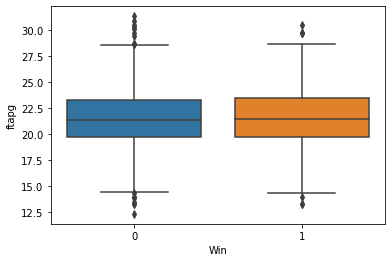

In [9]:
sns.boxplot(x = 'Win',y = 'ftapg' ,data = tourney)

<AxesSubplot:xlabel='Win', ylabel='W-L%'>

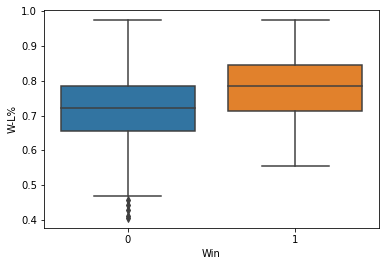

In [10]:
sns.boxplot(x = 'Win',y = 'W-L%' ,data = tourney)

<AxesSubplot:xlabel='Win', ylabel='SRS'>

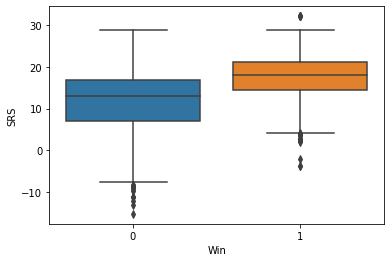

In [11]:
sns.boxplot(x = 'Win',y = 'SRS' ,data = tourney)

<AxesSubplot:xlabel='Win', ylabel='SOS'>

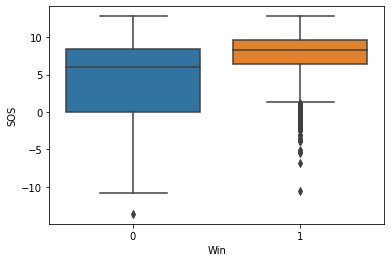

In [12]:
sns.boxplot(x = 'Win',y = 'SOS' ,data = tourney)

<AxesSubplot:xlabel='Win', ylabel='FG%'>

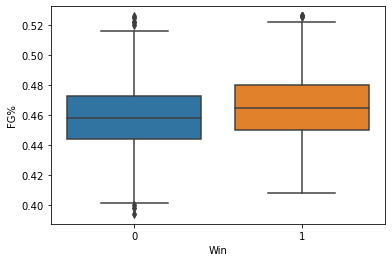

In [13]:
sns.boxplot(x = 'Win',y = 'FG%' ,data = tourney)

<AxesSubplot:xlabel='Win', ylabel='3P%'>

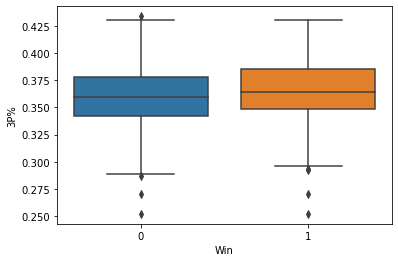

In [14]:
sns.boxplot(x = 'Win',y = '3P%' ,data = tourney)

<AxesSubplot:xlabel='Win', ylabel='FT%'>

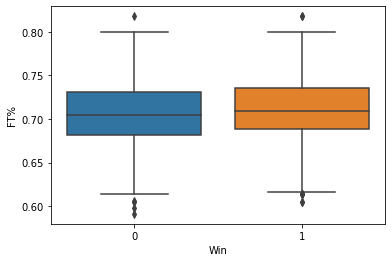

In [15]:
sns.boxplot(x = 'Win',y = 'FT%' ,data = tourney)

<AxesSubplot:xlabel='Win', ylabel='rpg'>

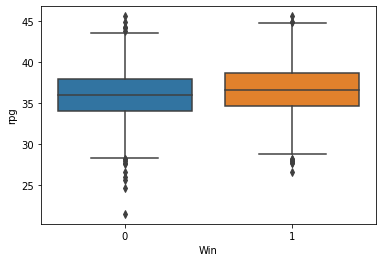

In [16]:
sns.boxplot(x = 'Win',y = 'rpg' ,data = tourney)

<AxesSubplot:xlabel='Win', ylabel='apg'>

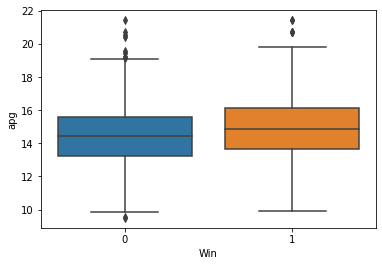

In [17]:
sns.boxplot(x = 'Win',y = 'apg' ,data = tourney)

<AxesSubplot:xlabel='Win', ylabel='spg'>

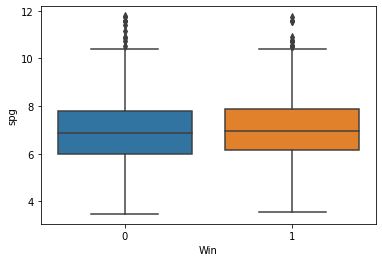

In [18]:
sns.boxplot(x = 'Win',y = 'spg' ,data = tourney)

<AxesSubplot:xlabel='Win', ylabel='bpg'>

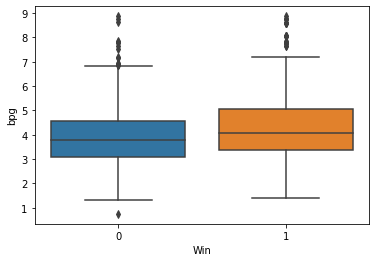

In [19]:
sns.boxplot(x = 'Win',y = 'bpg' ,data = tourney)

<AxesSubplot:xlabel='Win', ylabel='point_diff'>

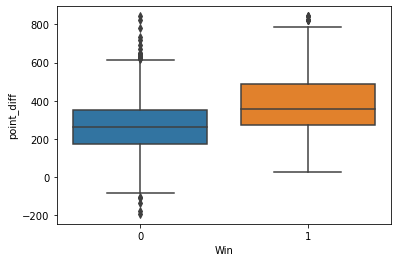

In [20]:
sns.boxplot(x = 'Win',y = 'point_diff' ,data = tourney)

<AxesSubplot:xlabel='Win', ylabel='tpg'>

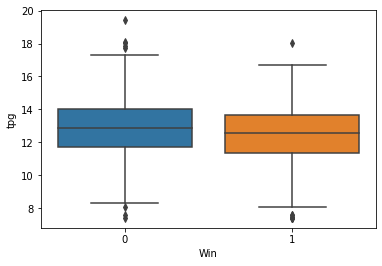

In [21]:
sns.boxplot(x = 'Win',y = 'tpg' ,data = tourney)

<AxesSubplot:xlabel='Win', ylabel='opp_point_diff'>

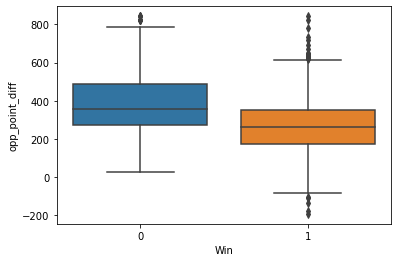

In [22]:
sns.boxplot(x = 'Win',y = 'opp_point_diff' ,data = tourney)

<AxesSubplot:xlabel='Win', ylabel='Opp_SRS'>

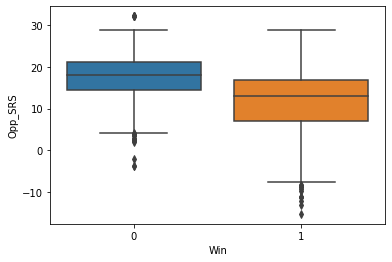

In [23]:
sns.boxplot(x = 'Win',y = 'Opp_SRS' ,data = tourney)

<AxesSubplot:xlabel='Win', ylabel='Opp_WLRat'>

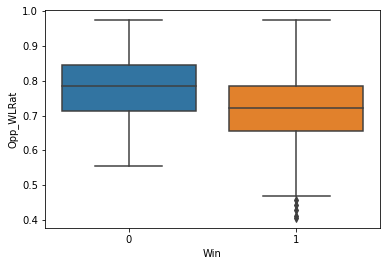

In [24]:
sns.boxplot(x = 'Win',y = 'Opp_WLRat' ,data = tourney)

## Models

In [25]:
from sklearn.model_selection import train_test_split
round1 = tourney[tourney['Round'] == 1]
y = tourney['Win']
X = tourney[['W-L%','SRS','SOS','point_diff','FG%','Opp_WLRat','Opp_SRS','opp_point_diff','Opp_SOS','Opp_FGperc']]
X = pd.concat([X,pd.get_dummies(tourney['Seed']),pd.get_dummies(tourney['Opp_Seed'])], axis = 1)
X = X.drop(['16_seed','16_seedopp'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [26]:
tourney

,Year,Round,Region Number,Region Name,Seed,Score,Team,Opponent,Opp_Score,Opp_Seed,...,ftapg,papg,opp_point_diff,opp_ppg,opp_rpg,opp_ftapg,opp_apg,opp_spg,opp_bpg,opp_tpg
0,2001,1_round,1,Midwest,1_seed,96,Illinois,Northwestern St,54,16_seedopp,...,25.142857,65.914286,-105,71.625000,36.812500,25.057143,12.250000,9.625000,4.156250,16.781250
1,2001,1_round,1,Midwest,16_seed,54,Northwestern St,Illinois,96,1_seedopp,...,27.406250,74.906250,418,77.857143,40.000000,27.500000,15.714286,7.685714,4.171429,14.971429
2,2001,1_round,1,Midwest,2_seed,101,Arizona,Eastern Illinois,76,15_seedopp,...,26.111111,66.277778,125,82.709677,36.258065,18.055556,16.580645,6.354839,3.741935,13.774194
3,2001,1_round,1,Midwest,15_seed,76,Eastern Illinois,Arizona,101,2_seedopp,...,20.967742,78.677419,540,81.277778,39.805556,30.322581,16.250000,7.861111,4.416667,15.166667
4,2001,1_round,1,Midwest,3_seed,72,Ole Miss,Iona,70,14_seedopp,...,23.685714,64.628571,174,77.242424,37.545455,23.485714,14.575758,7.848485,5.545455,16.878788
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2389,2019,5_round,1,Final Four,3_seed,61,Texas Tech,Michigan St,51,2_seedopp,...,18.263158,59.500000,491,77.564103,40.487179,19.710526,18.333333,5.153846,5.256410,12.641026
2390,2019,5_round,2,Final Four,1_seed,63,Virginia,Auburn,62,5_seedopp,...,15.736842,56.105263,438,79.700000,34.225000,20.000000,14.300000,9.225000,4.750000,11.650000
2391,2019,5_round,2,Final Four,5_seed,62,Auburn,Virginia,63,1_seedopp,...,19.000000,68.750000,582,71.421053,34.894737,14.950000,14.315789,5.552632,3.921053,9.000000
2392,2019,6_round,1,Championship,3_seed,77,Texas Tech,Virginia,85,1_seedopp,...,18.263158,59.500000,582,71.421053,34.894737,15.736842,14.315789,5.552632,3.921053,9.000000


In [27]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter = 2000)
lr.fit(X_train,y_train)
predicted = lr.predict(X_test)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

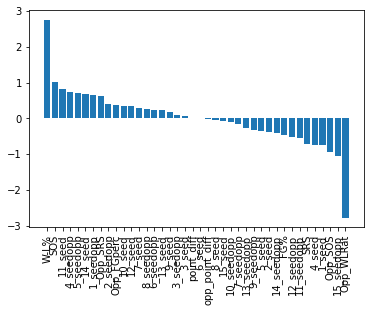

In [28]:
coef = lr.coef_[0]
coef = pd.Series(coef)
coef.index = X.columns
coef = coef.sort_values(ascending = False)
plt.bar(coef.index,coef)
plt.xticks(rotation = 'vertical')

In [29]:
X_test['label'] = predicted

<ipython-input-29-99ef65c95278>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['label'] = predicted


In [30]:
from sklearn.metrics import confusion_matrix,precision_score,recall_score, accuracy_score,f1_score
confusion_matrix(y_test,predicted)

array([[290,  68],
       [ 87, 274]])

In [31]:
print(precision_score(y_test,predicted))
print(recall_score(y_test,predicted))
print(f1_score(y_test,predicted))
print(accuracy_score(y_test,predicted))

0.8011695906432749
0.7590027700831025
0.7795163584637268
0.7844228094575799


In [32]:
from sklearn.ensemble import RandomForestClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
rf = RandomForestClassifier(n_estimators = 1000)
rf.fit(X_train,y_train)
predicted = rf.predict(X_test)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

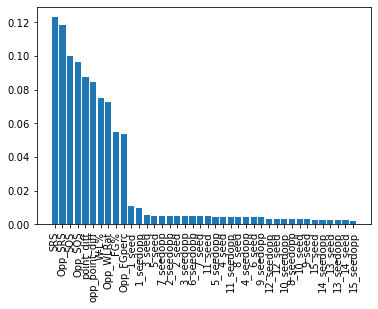

In [33]:
fi = rf.feature_importances_
fi = pd.Series(fi)
fi.index = X.columns
fi = fi.sort_values(ascending = False)
plt.bar(fi.index,fi)
plt.xticks(rotation = 'vertical')

In [34]:
confusion_matrix(y_test,predicted)

array([[277,  81],
       [ 97, 264]])

In [35]:
print(precision_score(y_test,predicted))
print(recall_score(y_test,predicted))
print(f1_score(y_test,predicted))
print(accuracy_score(y_test,predicted))

0.7652173913043478
0.7313019390581718
0.7478753541076487
0.7524339360222532


In [40]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train,y_train)
predicted = svc.predict(X_test)
confusion_matrix(y_test,predicted)
print(precision_score(y_test,predicted))
print(recall_score(y_test,predicted))
print(f1_score(y_test,predicted))
print(accuracy_score(y_test,predicted))

0.6986301369863014
0.7063711911357341
0.7024793388429753
0.6995827538247567


## Run Model on Prediction Data

In [37]:
lr = LogisticRegression(max_iter = 2000)
y = tourney['Win']
X = tourney[['W-L%','SRS','SOS','point_diff','FG%','Opp_WLRat','Opp_SRS','opp_point_diff','Opp_SOS','Opp_FGperc']]
X = pd.concat([X,pd.get_dummies(tourney['Seed']),pd.get_dummies(tourney['Opp_Seed'])], axis = 1)
X = X.drop(['16_seed','16_seedopp'], axis = 1)
prediction_data = pd.concat([prediction_data,pd.get_dummies(prediction_data['Seed']),pd.get_dummies(prediction_data['Opp_Seed'])], axis = 1)
prediction_data = prediction_data.drop(['16_seed','16_seedopp'], axis = 1)
lr.fit(X,y)

LogisticRegression(max_iter=2000)

In [38]:
final_predictions = lr.predict(prediction_data[X.columns])

In [39]:
prediction_data['label'] = final_predictions

In [42]:
prediction_data[prediction_data['Seed'] == "6_seed"]

,Round,Region,Seed,Team,Opponent,Opp_Seed,G,W_overall,L_overall,W-L%,...,1_seedopp,2_seedopp,3_seedopp,4_seedopp,5_seedopp,6_seedopp,7_seedopp,8_seedopp,9_seedopp,label
10,1_round,Midwest,6_seed,San Diego State,Syracuse,11_seedopp,27,23,4,0.852,...,0,0,0,0,0,0,0,0,0,0
26,1_round,South,6_seed,Texas Tech,Utah State,11_seedopp,27,17,10,0.630,...,0,0,0,0,0,0,0,0,0,1
44,1_round,East,6_seed,Brigham Young,Michigan State,11_seedopp,26,20,6,0.769,...,0,0,0,0,0,0,0,0,0,0
46,1_round,East,6_seed,Brigham Young,UCLA,11_seedopp,26,20,6,0.769,...,0,0,0,0,0,0,0,0,0,0
64,1_round,West,6_seed,Southern California,Wichita State,11_seedopp,29,22,7,0.759,...,0,0,0,0,0,0,0,0,0,0
66,1_round,West,6_seed,Southern California,Drake,11_seedopp,29,22,7,0.759,...,0,0,0,0,0,0,0,0,0,1


In [44]:
lr.predict_proba(prediction_data[X.columns])

array([[0.00200684, 0.99799316],
       [0.9979722 , 0.0020278 ],
       [0.06454905, 0.93545095],
       [0.93480251, 0.06519749],
       [0.08199555, 0.91800445],
       [0.91777147, 0.08222853],
       [0.28738981, 0.71261019],
       [0.71198531, 0.28801469],
       [0.91754262, 0.08245738],
       [0.0824096 , 0.9175904 ],
       [0.76841083, 0.23158917],
       [0.22989559, 0.77010441],
       [0.67084263, 0.32915737],
       [0.32903535, 0.67096465],
       [0.74697093, 0.25302907],
       [0.25105429, 0.74894571],
       [0.14539314, 0.85460686],
       [0.85243362, 0.14756638],
       [0.14614774, 0.85385226],
       [0.85420581, 0.14579419],
       [0.00196285, 0.99803715],
       [0.99797974, 0.00202026],
       [0.06348738, 0.93651262],
       [0.93617181, 0.06382819],
       [0.0263615 , 0.9736385 ],
       [0.97314327, 0.02685673],
       [0.46836447, 0.53163553],
       [0.52880812, 0.47119188],
       [0.18993499, 0.81006501],
       [0.80889663, 0.19110337],
       [0.

In [54]:
tourney.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2394 entries, 0 to 2393
Data columns (total 78 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Year            2394 non-null   int64  
 1   Round           2394 non-null   object 
 2   Region Number   2394 non-null   int64  
 3   Region Name     2394 non-null   object 
 4   Seed            2394 non-null   object 
 5   Score           2394 non-null   int64  
 6   Team            2394 non-null   object 
 7   Opponent        2394 non-null   object 
 8   Opp_Score       2394 non-null   int64  
 9   Opp_Seed        2394 non-null   object 
 10  Win             2394 non-null   int64  
 11  G               2394 non-null   int64  
 12  W_overall       2394 non-null   int64  
 13  L_overall       2394 non-null   int64  
 14  W-L%            2394 non-null   float64
 15  SRS             2394 non-null   float64
 16  SOS             2394 non-null   float64
 17  Tm.             2394 non-null   i